In [1]:
import pandas as pd
import numpy as np

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}
df = pd.DataFrame(data)

# Density-Based Features
radius = 500  # Adjust the radius as needed
df['local_density_percentile'] = df.apply(lambda row: (df['maturity_value'] <= row['maturity_value'] + radius) &
                                                     (df['maturity_value'] >= row['maturity_value'] - radius),
                                           axis=1).mean(axis=1)

# Distance-Based Features
df['average_distance_to_all'] = df.apply(lambda row: np.mean(np.sqrt((df['maturity_value'] - row['maturity_value'])**2)),
                                         axis=1)

# Proximity-Based Features
proximity_radius = 800  # Adjust the radius as needed
df['num_points_within_radius'] = df.apply(lambda row: df[(df['maturity_value'] <= row['maturity_value'] + proximity_radius) &
                                                          (df['maturity_value'] >= row['maturity_value'] - proximity_radius)].shape[0],
                                          axis=1)

# Density-Radius Features
df['density_to_radius_ratio'] = df['num_points_within_radius'] / (2 * radius)

# Anomaly Score Features
df['rank_of_distance'] = df['average_distance_to_all'].rank()

# Nearest Neighbor Features
k_neighbors = 3  # Adjust the number of neighbors as needed
df['average_distance_to_neighbors'] = df.apply(lambda row: np.mean(np.partition(np.sqrt((df['maturity_value'] - row['maturity_value'])**2), k_neighbors)[:k_neighbors]),
                                               axis=1)

# Quantile-Based Features
df['distance_percentile'] = df['average_distance_to_all'].rank(pct=True)

# Weighted Distance Features
category_weights = {'S.A': 1.2, 'I.T': 1.0, 'D.A': 0.8, 'T.H': 0.9, 'J.K': 1.1}  # Adjust weights as needed
df['weighted_avg_distance'] = df.apply(lambda row: np.average(np.sqrt((df['maturity_value'] - row['maturity_value'])**2),
                                                              weights=[category_weights[c] for c in df['category']]),
                                       axis=1)

# Print the resulting DataFrame with added features
print(df)


   maturity_value category currency  amount  local_density_percentile  \
0            1000      S.A      USD     500                       0.6   
1            2000      I.T      GBP     800                       0.6   
2            1500      D.A      USD     600                       1.0   
3            1200      T.H      JPY     700                       0.6   
4            1800      J.K      GBP     900                       0.6   

   average_distance_to_all  num_points_within_radius  density_to_radius_ratio  \
0                    500.0                         4                    0.004   
1                    500.0                         4                    0.004   
2                    320.0                         5                    0.005   
3                    380.0                         5                    0.005   
4                    380.0                         5                    0.005   

   rank_of_distance  average_distance_to_neighbors  distance_percentile  \

In [ ]:
Certainly, here are some non-algorithmic computational methods to create features based on density, distance, and proximity concepts:

Density-Based Features:

Local Density Percentile: For each data point, calculate the percentage of other points within a certain radius. This can give you an idea of how densely packed the points are around each data point.
Distance-Based Features:

Average Distance to All Data Points: Compute the average Euclidean distance of each data point to all other data points. This can give a general idea of how spread out a point is from the rest of the data.
Proximity-Based Features:

Number of Points within Radius: Count the number of data points within a certain radius of each data point. This count can serve as a proximity-related feature.
Density-Radius Features:

Density-to-Radius Ratio: Calculate the ratio of the number of points within a certain radius to the area (volume in higher dimensions) that radius covers. This can indicate how densely points are distributed in a local region.
Anomaly Score Features:

Rank of Sorted Distances: Sort the distances of each data point to all other data points and calculate the rank of the data point's own distance. This can indicate how far or near the data point is compared to others.
Nearest Neighbor Features:

Average Distance to Nearest Neighbors: For each data point, calculate the average distance to its k-nearest neighbors. A higher average distance could indicate potential anomaly.
Quantile-Based Features:

Percentile of Distance: Calculate the percentile rank of each data point's distance to all other data points. This can give you a measure of how distant a data point is compared to the rest.
Weighted Distance Features:

Weighted Average Distance: Assign different weights to each data point based on a certain criterion (e.g., based on the category or currency), and calculate the weighted average distance of each data point to others.
These non-algorithmic computational methods provide you with a way to compute features related to density, distance, and proximity without relying on running specific algorithms. However, keep in mind that while these methods can provide insights, they might not be as sophisticated as some algorithmic approaches specifically designed for anomaly detection. Therefore, it's advisable to complement these features with algorithmic methods for a more comprehensive anomaly detection solution.

In [ ]:
# Local Density Percentile:
For each data point, calculate the percentage of other data points within a certain radius. This can be a measure of how densely the points are packed around each point.

Local Density Ratio:
Calculate the ratio of the number of data points within a certain radius to the total number of data points. This can indicate how concentrated the points are in a local region.

Density Ranking:
Rank data points based on the number of other points within a certain radius. Points with lower rankings might be indicative of anomalies.

Density Variability:
Calculate the standard deviation of the number of data points within a certain radius for each data point. Points with higher variability might be anomalies.

Relative Density:
Compute the density of each data point relative to the average density of the entire dataset. Points with lower relative densities could be anomalies.

Inverse Density:
Calculate the inverse of the density for each data point. This could help identify points that are in sparse regions.

Density Percentile in Cluster:
If you group data points into clusters, calculate the percentile of the density within each cluster. Points with lower percentiles might be anomalies.

Distance-Weighted Density:
Calculate the density for each data point based on the inverse of distances to its k-nearest neighbors. Anomalies might have lower distance-weighted densities.

Density-Based Outlier Score:
Combine multiple density-related features into a single score that captures the anomaly likelihood based on density patterns.

Density vs. Nearest Neighbor Ratio:
Calculate the ratio of the local density to the distance of the nearest neighbor. Anomalies might have lower ratios.

Local Density Trend:
Calculate the trend of density change for each data point over a window of time. Abrupt changes might indicate anomalies.

Density Differential:
Calculate the difference in density between a data point and its k-nearest neighbors. Anomalies might have larger density differentials.

In [7]:
%%time
# Loop through each variable and calculate density-based features
for var in variables_to_process:
    # Local Density Percentile
    df[f'{var}_local_density_percentile'] = df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                                    (df[var] >= row[var] - radius),
                                                      axis=1).mean(axis=1)
#print(df)


KeyboardInterrupt



In [11]:
%%time
variables_to_process = ['maturity_value', 'category', 'currency', 'amount']
df= data
radius = 500
for var in variables_to_process:
    lower_bound = df[variables_to_process].sub(radius).values
    upper_bound = df[variables_to_process].add(radius).values
    mask = (lower_bound <= df[var].values.reshape(-1, 1)) & (upper_bound >= df[var].values.reshape(-1, 1))
    
    local_density_percentile = np.mean(mask, axis=1)
    df[f'{var}_local_density_percentile'] = local_density_percentile

# Print the resulting DataFrame with added features
df.head()

CPU times: total: 125 ms
Wall time: 119 ms


,maturity_value,category,currency,amount,maturity_value_local_density_percentile,category_local_density_percentile,currency_local_density_percentile,amount_local_density_percentile
0,1000,3,2,500,0.50,0.75,0.75,1.00
1,2000,1,0,800,0.25,0.50,0.50,0.25
2,1500,0,2,600,0.25,0.50,0.50,0.25
3,1200,4,1,700,0.50,0.50,0.50,0.50
4,1800,2,0,900,0.25,0.50,0.50,0.25


In [9]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}

# Create a DataFrame with 10,000 records by repeating the sample data
num_records = 210000
data_extended = {key: np.tile(values, num_records // len(values)) for key, values in data.items()}
data = pd.DataFrame(data_extended)

# Encode categorical variables
label_encoders = {}
categorical_vars = ['category', 'currency']
for var in categorical_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le
    
# Print the resulting DataFrame
print(data.head())
data.shape

   maturity_value  category  currency  amount
0            1000         3         2     500
1            2000         1         0     800
2            1500         0         2     600
3            1200         4         1     700
4            1800         2         0     900


(210000, 4)

In [10]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}
data = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
categorical_vars = ['category', 'currency']
for var in categorical_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le
    
# Parameters for density-based features
radius = 500  # Adjust the radius as needed
k_neighbors = 3  # Adjust the number of neighbors as needed

# List of variables for which to calculate density-based features
variables_to_process = ['maturity_value', 'category', 'currency', 'amount']

df = data
# Loop through each variable and calculate density-based features
for var in variables_to_process:
    # Local Density Percentile
    df[f'{var}_local_density_percentile'] = df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                                    (df[var] >= row[var] - radius),
                                                      axis=1).mean(axis=1)

    # Local Density Ratio
    df[f'{var}_local_density_ratio'] = df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                                 (df[var] >= row[var] - radius),
                                                 axis=1).sum(axis=1) / df.shape[0]

    # Density Ranking
    df[f'{var}_density_rank'] = df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                     (df[var] >= row[var] - radius),
                                         axis=1).sum(axis=1).rank()

    # Density Variability
    df[f'{var}_density_variability'] = df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                              (df[var] >= row[var] - radius),
                                                 axis=1).std(axis=1)

    # Relative Density
    total_data_points = df.shape[0]
    df[f'{var}_relative_density'] = df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                          (df[var] >= row[var] - radius),
                                             axis=1).sum(axis=1) / total_data_points

    # Inverse Density
    df[f'{var}_inverse_density'] = 1 / df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                                 (df[var] >= row[var] - radius),
                                                 axis=1).sum(axis=1)

    # Density Percentile in Cluster (using category as a cluster)
    df[f'{var}_density_percentile_in_cluster'] = df.groupby(var)[f'{var}_local_density_ratio'].rank(pct=True)

    # Distance-Weighted Density
    df[f'{var}_distance_weighted_density'] = df.apply(lambda row: np.sum(1 / np.sqrt((df[var] - row[var])**2)) / k_neighbors,
                                                      axis=1)

    # Density-Based Outlier Score
    df[f'{var}_density_outlier_score'] = df[f'{var}_local_density_ratio'] * df[f'{var}_relative_density'] / \
                                         (df[f'{var}_density_rank'] + df[f'{var}_density_variability'])
    
    

    # Local Density Range
    df[f'{var}_local_density_range'] = df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                               (df[var] >= row[var] - radius),
                                                 axis=1).sum(axis=1) - df.apply(lambda row: (df[var] <= row[var] + radius) &
                                                                                          (df[var] >= row[var] - radius),
                                                                              axis=1).min(axis=1)



# Print the resulting DataFrame with added features
print(df)


   maturity_value  category  currency  amount  \
0            1000         3         2     500   
1            2000         1         0     800   
2            1500         0         2     600   
3            1200         4         1     700   
4            1800         2         0     900   

   maturity_value_local_density_percentile  \
0                                      0.6   
1                                      0.6   
2                                      1.0   
3                                      0.6   
4                                      0.6   

   maturity_value_local_density_ratio  maturity_value_density_rank  \
0                                 0.6                          2.5   
1                                 0.6                          2.5   
2                                 1.0                          5.0   
3                                 0.6                          2.5   
4                                 0.6                          2.5   

   matu

In [ ]:
This code manually calculates the absolute differences between the variable values of each data point and 
its neighbors, sorts the distances, and then calculates the average of the k smallest distances. 

In [16]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean

# Parameters for distance-based features
k_neighbors = 3  # Adjust the number of neighbors as needed

# List of variables for which to calculate distance-based features
variables_to_process = ['maturity_value', 'amount']


# Loop through each variable and calculate distance-based features
for var in variables_to_process:
    # Average Distance to k Nearest Neighbors
    avg_distances = []

    for idx, row in df.iterrows():
        distances = []
        for _, neighbor_row in df.iterrows():
            if idx != _:
                distance = abs(row[var] - neighbor_row[var])
                distances.append(distance)
        distances.sort()
        avg_distance = np.mean(distances[:k_neighbors])
        avg_distances.append(avg_distance)

    df[f'{var}_avg_distance_to_neighbors'] = avg_distances

# Print the resulting DataFrame with added features
print(df)

   maturity_value  category  currency  amount  \
0            1000         3         2     500   
1            2000         1         0     800   
2            1500         0         2     600   
3            1200         4         1     700   
4            1800         2         0     900   

   maturity_value_local_density_percentile  \
0                                      0.6   
1                                      0.6   
2                                      1.0   
3                                      0.6   
4                                      0.6   

   maturity_value_local_density_ratio  maturity_value_density_rank  \
0                                 0.6                          2.5   
1                                 0.6                          2.5   
2                                 1.0                          5.0   
3                                 0.6                          2.5   
4                                 0.6                          2.5   

   matu

In [17]:
import pandas as pd
import numpy as np


# Parameters for proximity-based features
proximity_variable = 'maturity_value'  # Choose a variable for proximity calculation

# Parameters for density-radius features
radius = 500  # Adjust the radius as needed

# List of variables for which to calculate proximity-based and density-radius features
variables_to_process = ['maturity_value', 'amount']

# Loop through each variable and calculate proximity-based and density-radius features
for var in variables_to_process:
    # Proximity to Selected Variable
    df[f'{var}_proximity_to_{proximity_variable}'] = np.abs(df[proximity_variable] - df[var])
    
    # Density in Radius
    def calculate_density_in_radius(row):
        neighborhood = df[(df[proximity_variable] <= row[proximity_variable] + radius) &
                          (df[proximity_variable] >= row[proximity_variable] - radius)]
        return len(neighborhood) / (2 * radius)
    
    df[f'{var}_density_in_{radius}radius'] = df.apply(calculate_density_in_radius, axis=1)

# Print the resulting DataFrame with added features
print(df)


   maturity_value  category  currency  amount  \
0            1000         3         2     500   
1            2000         1         0     800   
2            1500         0         2     600   
3            1200         4         1     700   
4            1800         2         0     900   

   maturity_value_local_density_percentile  \
0                                      0.6   
1                                      0.6   
2                                      1.0   
3                                      0.6   
4                                      0.6   

   maturity_value_local_density_ratio  maturity_value_density_rank  \
0                                 0.6                          2.5   
1                                 0.6                          2.5   
2                                 1.0                          5.0   
3                                 0.6                          2.5   
4                                 0.6                          2.5   

   matu

Optimal Radius: 20


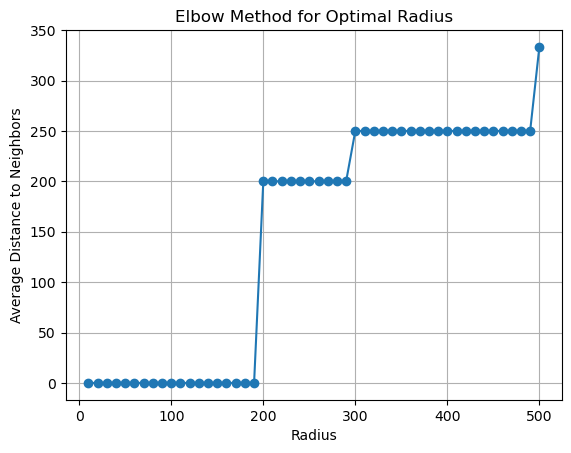

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}
df = pd.DataFrame(data)

# Parameters for the Elbow Method
max_radius = 500  # Adjust this based on your dataset and the scale of the variable

# Choose a variable for radius calculation
radius_variable = 'maturity_value'

# Calculate average distances to k-nearest neighbors for each radius
avg_distances = []
radius_values = np.arange(10, max_radius + 1, step=10)  # Define a reasonable range of radius values
for radius in radius_values:
    # Calculate distances to neighbors within the radius
    distances = []
    for idx, row in df.iterrows():
        neighbors = df[(df.index != idx) & (abs(df[radius_variable] - row[radius_variable]) <= radius)]
        if len(neighbors) > 0:
            distances.extend(abs(neighbors[radius_variable] - row[radius_variable]).tolist())
    
    # Calculate the average distance for this radius
    avg_distance = np.mean(distances) if distances else 0
    avg_distances.append(avg_distance)

# Plot the average distances and use the Elbow Method to find a reasonable radius
plt.plot(radius_values, avg_distances, marker='o')
plt.xlabel('Radius')
plt.ylabel('Average Distance to Neighbors')
plt.title('Elbow Method for Optimal Radius')
plt.grid()

# Find the index of the "elbow point"
elbow_index = np.argmin(np.diff(avg_distances)) + 1

# Get the optimal radius value
optimal_radius = radius_values[elbow_index]

# Print the optimal radius value
print("Optimal Radius:", optimal_radius)

# Further processing using the optimal_radius variable
# ...

plt.show()


var maturity_value
radius_values [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400 410 420 430 440 450 460 470 480 490 500]


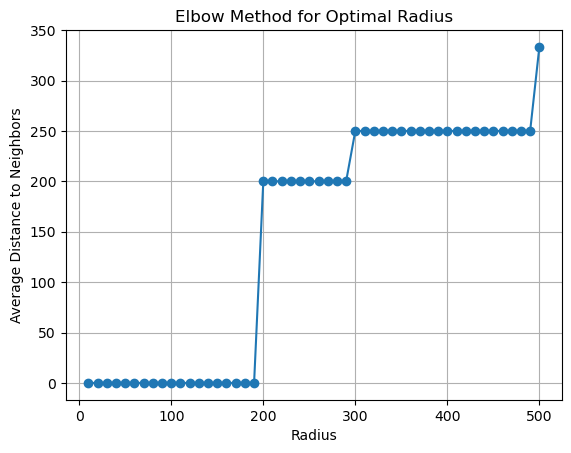

optimal_radius 20
var category
radius_values [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400 410 420 430 440 450 460 470 480 490 500]


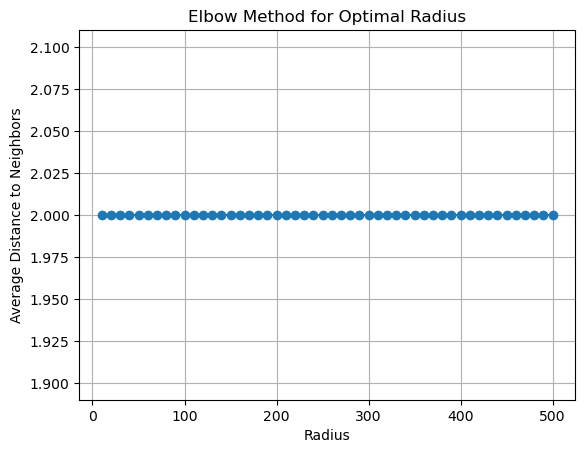

optimal_radius 20
var currency
radius_values [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400 410 420 430 440 450 460 470 480 490 500]


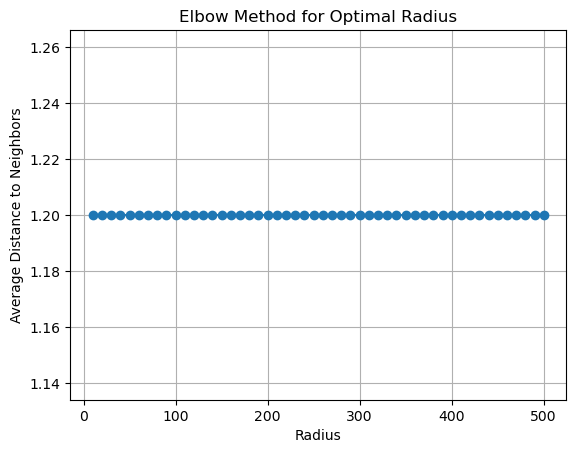

optimal_radius 20
var amount
radius_values [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400 410 420 430 440 450 460 470 480 490 500]


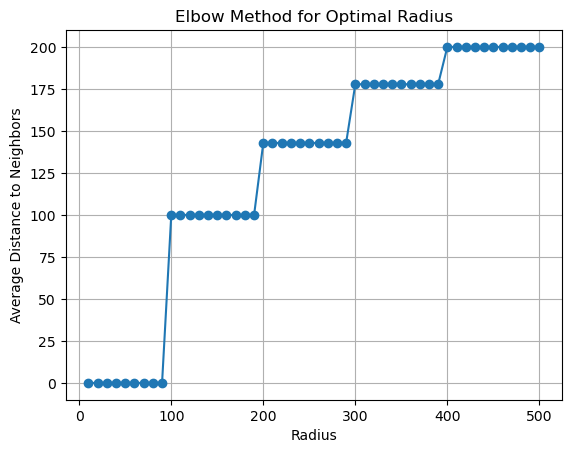

optimal_radius 20
   maturity_value  category  currency  amount  \
0            1000         3         2     500   
1            2000         1         0     800   
2            1500         0         2     600   
3            1200         4         1     700   
4            1800         2         0     900   

   maturity_value_local_density_percentile  \
0                                      0.2   
1                                      0.2   
2                                      0.2   
3                                      0.2   
4                                      0.2   

   maturity_value_local_density_ratio  maturity_value_density_rank  \
0                                 0.2                          3.0   
1                                 0.2                          3.0   
2                                 0.2                          3.0   
3                                 0.2                          3.0   
4                                 0.2                       

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}
data = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
categorical_vars = ['category', 'currency']
for var in categorical_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le
    
# Parameters for density-based features
k_neighbors = 3  # Adjust the number of neighbors as needed

# List of variables for which to calculate density-based features
variables_to_process = ['maturity_value', 'category', 'currency', 'amount']

df = data

# Loop through each variable and calculate density-based features
for var in variables_to_process:
    print("var", var)
    # Choose a variable for radius calculation
    radius_variable = var
    
    # Calculate average distances to k-nearest neighbors for each radius
    avg_distances = []
    radius_values = np.arange(10, 500 + 1, step=10)  # Define a reasonable range of radius values
    print("radius_values", radius_values)
    for radius in radius_values:
        # Calculate distances to neighbors within the radius
        distances = []
        for idx, row in df.iterrows():
            neighbors = df[(df.index != idx) & (abs(df[radius_variable] - row[radius_variable]) <= radius)]
            if len(neighbors) > 0:
                distances.extend(abs(neighbors[radius_variable] - row[radius_variable]).tolist())
        
        # Calculate the average distance for this radius
        avg_distance = np.mean(distances) if distances else 0
        avg_distances.append(avg_distance)
    
    # Plot the average distances and use the Elbow Method to find a reasonable radius
    plt.plot(radius_values, avg_distances, marker='o')
    plt.xlabel('Radius')
    plt.ylabel('Average Distance to Neighbors')
    plt.title('Elbow Method for Optimal Radius')
    plt.grid()

    # Find the index of the "elbow point"
    elbow_index = np.argmin(np.diff(avg_distances)) + 1

    # Get the optimal radius value
    optimal_radius = radius_values[elbow_index]
    plt.show()
    print("optimal_radius", optimal_radius)

    # Density-Based Feature Calculations
    df[f'{var}_local_density_percentile'] = df.apply(lambda row: (df[var] <= row[var] + optimal_radius) &
                                                                    (df[var] >= row[var] - optimal_radius),
                                                      axis=1).mean(axis=1)

    df[f'{var}_local_density_ratio'] = df.apply(lambda row: (df[var] <= row[var] + optimal_radius) &
                                                                 (df[var] >= row[var] - optimal_radius),
                                                 axis=1).sum(axis=1) / df.shape[0]

    df[f'{var}_density_rank'] = df.apply(lambda row: (df[var] <= row[var] + optimal_radius) &
                                                     (df[var] >= row[var] - optimal_radius),
                                         axis=1).sum(axis=1).rank()

    df[f'{var}_density_variability'] = df.apply(lambda row: (df[var] <= row[var] + optimal_radius) &
                                                              (df[var] >= row[var] - optimal_radius),
                                                 axis=1).std(axis=1)

    total_data_points = df.shape[0]
    df[f'{var}_relative_density'] = df.apply(lambda row: (df[var] <= row[var] + optimal_radius) &
                                                          (df[var] >= row[var] - optimal_radius),
                                             axis=1).sum(axis=1) / total_data_points

    df[f'{var}_inverse_density'] = 1 / df.apply(lambda row: (df[var] <= row[var] + optimal_radius) &
                                                                 (df[var] >= row[var] - optimal_radius),
                                                 axis=1).sum(axis=1)

    df[f'{var}_density_percentile_in_cluster'] = df.groupby(var)[f'{var}_local_density_ratio'].rank(pct=True)

    df[f'{var}_distance_weighted_density'] = df.apply(lambda row: np.sum(1 / np.sqrt((df[var] - row[var])**2)) / k_neighbors,
                                                      axis=1)

    df[f'{var}_density_outlier_score'] = df[f'{var}_local_density_ratio'] * df[f'{var}_relative_density'] / \
                                         (df[f'{var}_density_rank'] + df[f'{var}_density_variability'])

    df[f'{var}_local_density_range'] = df.apply(lambda row: (df[var] <= row[var] + optimal_radius) &
                                                               (df[var] >= row[var] - optimal_radius),
                                                 axis=1).sum(axis=1) - df.apply(lambda row: (df[var] <= row[var] + optimal_radius) &
                                                                                          (df[var] >= row[var] - optimal_radius),
                                                                              axis=1).min(axis=1)
    # Parameters for proximity-based features
    proximity_variable = 'maturity_value'  # Choose a variable for proximity calculation
    
    
    # Proximity to Selected Variable
    df[f'{var}_proximity_to_{proximity_variable}'] = np.abs(df[proximity_variable] - df[var])
    
    # Density in Radius
    def calculate_density_in_radius(row):
        neighborhood = df[(df[proximity_variable] <= row[proximity_variable] + optimal_radius) &
                          (df[proximity_variable] >= row[proximity_variable] - optimal_radius)]
        return len(neighborhood) / (2 * optimal_radius)
    
    df[f'{var}_density_in_{optimal_radius}radius'] = df.apply(calculate_density_in_radius, axis=1)

# Print the resulting DataFrame with added features
print(df)


In [24]:
df.head()

,maturity_value,category,currency,amount,maturity_value_local_density_percentile,maturity_value_local_density_ratio,maturity_value_density_rank,maturity_value_density_variability,maturity_value_relative_density,maturity_value_inverse_density,...,amount_density_rank,amount_density_variability,amount_relative_density,amount_inverse_density,amount_density_percentile_in_cluster,amount_distance_weighted_density,amount_density_outlier_score,amount_local_density_range,amount_proximity_to_maturity_value,amount_density_in_20radius
0,1000,3,2,500,0.2,0.2,3.0,0.447214,0.2,1.0,...,3.0,0.447214,0.2,1.0,1.0,inf,0.011604,1,500,0.025
1,2000,1,0,800,0.2,0.2,3.0,0.447214,0.2,1.0,...,3.0,0.447214,0.2,1.0,1.0,inf,0.011604,1,1200,0.025
2,1500,0,2,600,0.2,0.2,3.0,0.447214,0.2,1.0,...,3.0,0.447214,0.2,1.0,1.0,inf,0.011604,1,900,0.025
3,1200,4,1,700,0.2,0.2,3.0,0.447214,0.2,1.0,...,3.0,0.447214,0.2,1.0,1.0,inf,0.011604,1,500,0.025
4,1800,2,0,900,0.2,0.2,3.0,0.447214,0.2,1.0,...,3.0,0.447214,0.2,1.0,1.0,inf,0.011604,1,900,0.025


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from scipy.stats import percentileofscore

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}
data = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
categorical_vars = ['category', 'currency']
for var in categorical_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le

# Parameters for nearest neighbor features
k_neighbors = 3  # Adjust the number of neighbors as needed

# List of variables for which to calculate features
variables_to_process = ['maturity_value', 'category', 'currency', 'amount']

df = data

# Loop through each variable and calculate features
for var in variables_to_process:
    
    # Calculate quantile-based features
    df[f'{var}_quantile_25'] = np.percentile(df[var], 25)
    df[f'{var}_quantile_75'] = np.percentile(df[var], 75)
    
    # Calculate weighted distance features
    df[f'{var}_weighted_distance'] = np.sum(np.sqrt((df[var] - df[var].mean())**2)) / df.shape[0]
    
    # Calculate anomaly score features (using example calculations)
    df[f'{var}_anomaly_score'] = (df[var] - df[var].mean()) / df[var].std()
    df[f'{var}_anomaly_score_rank'] = df[f'{var}_anomaly_score'].rank(ascending=False)
    

# Print the resulting DataFrame with added features
print(df)


   maturity_value  category  currency  amount  maturity_value_quantile_25  \
0            1000         3         2     500                      1200.0   
1            2000         1         0     800                      1200.0   
2            1500         0         2     600                      1200.0   
3            1200         4         1     700                      1200.0   
4            1800         2         0     900                      1200.0   

   maturity_value_quantile_75  maturity_value_weighted_distance  \
0                      1800.0                             320.0   
1                      1800.0                             320.0   
2                      1800.0                             320.0   
3                      1800.0                             320.0   
4                      1800.0                             320.0   

   maturity_value_anomaly_score  maturity_value_anomaly_score_rank  \
0                     -1.212678                                5

In [29]:
# Calculate the covariance matrix
cov_matrix = df.cov()

# Calculate the inverse covariance matrix (pseudoinverse to handle possible singularity)
inv_cov_matrix = np.linalg.pinv(cov_matrix)

# Calculate the Mahalanobis distance for each data point
center = df.mean()
mahalanobis_distances = []
for index, row in df.iterrows():
    diff = row - center
    mahalanobis_distance = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
    mahalanobis_distances.append(mahalanobis_distance)

df['mahalanobis_distance'] = mahalanobis_distances

# Print the resulting DataFrame with added features
print(df)

   maturity_value  category  currency  amount  maturity_value_quantile_25  \
0            1000         3         2     500                      1200.0   
1            2000         1         0     800                      1200.0   
2            1500         0         2     600                      1200.0   
3            1200         4         1     700                      1200.0   
4            1800         2         0     900                      1200.0   

   maturity_value_quantile_75  maturity_value_weighted_distance  \
0                      1800.0                             320.0   
1                      1800.0                             320.0   
2                      1800.0                             320.0   
3                      1800.0                             320.0   
4                      1800.0                             320.0   

   maturity_value_anomaly_score  maturity_value_anomaly_score_rank  \
0                     -1.212678                                5

In [33]:
# Calculate entropy
def calculate_entropy(series):
    p = series.value_counts() / len(series)
    return -np.sum(p * np.log2(p))

for var in variables_to_process:
    df[f'{var}_entropy'] = df[var].rolling(window=5).apply(calculate_entropy)

df.head()

,maturity_value,category,currency,amount,maturity_value_quantile_25,maturity_value_quantile_75,maturity_value_weighted_distance,maturity_value_anomaly_score,maturity_value_anomaly_score_rank,category_quantile_25,...,amount_quantile_25,amount_quantile_75,amount_weighted_distance,amount_anomaly_score,amount_anomaly_score_rank,mahalanobis_distance,maturity_value_entropy,category_entropy,currency_entropy,amount_entropy
0,1000,3,2,500,1200.0,1800.0,320.0,-1.212678,5.0,1.0,...,600.0,800.0,120.0,-1.264911,5.0,1.788854,NaN,NaN,NaN,NaN
1,2000,1,0,800,1200.0,1800.0,320.0,1.212678,1.0,1.0,...,600.0,800.0,120.0,0.632456,2.0,1.788854,NaN,NaN,NaN,NaN
2,1500,0,2,600,1200.0,1800.0,320.0,0.000000,3.0,1.0,...,600.0,800.0,120.0,-0.632456,4.0,1.788854,NaN,NaN,NaN,NaN
3,1200,4,1,700,1200.0,1800.0,320.0,-0.727607,4.0,1.0,...,600.0,800.0,120.0,0.000000,3.0,1.788854,NaN,NaN,NaN,NaN
4,1800,2,0,900,1200.0,1800.0,320.0,0.727607,2.0,1.0,...,600.0,800.0,120.0,1.264911,1.0,1.788854,2.321928,2.321928,1.521928,2.321928


In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}
data = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
categorical_vars = ['category', 'currency']
for var in categorical_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le
    
# List of features for anomaly detection
features_to_use = ['maturity_value', 'category', 'currency', 'amount']

# Initialize anomaly detection models
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination parameter
local_outlier_factor = LocalOutlierFactor(contamination=0.05)  # Adjust contamination parameter
one_class_svm = OneClassSVM(nu=0.05)  # Adjust nu parameter

df = data

# Fit models on each feature
for feature in features_to_use:
    X = df[feature].values.reshape(-1, 1)
    
    df[f'{feature}_isolation_forest'] = isolation_forest.fit_predict(X)
    df[f'{feature}_local_outlier_factor'] = local_outlier_factor.fit_predict(X)
    df[f'{feature}_one_class_svm'] = one_class_svm.fit_predict(X)

# Perform majority vote to determine anomalies
def majority_vote(row):
    predictions = [row[f'{feature}_isolation_forest'] +
                   row[f'{feature}_local_outlier_factor'] +
                   row[f'{feature}_one_class_svm'] for feature in features_to_use]
    return sum(predictions) / len(features_to_use)

df['majority_vote'] = df.apply(majority_vote, axis=1)

# Define a threshold to classify anomalies (you can adjust this based on your data)
anomaly_threshold = 2  # Adjust threshold as needed

df['anomaly'] = df['majority_vote'] > anomaly_threshold

# Print the resulting DataFrame with added features
print(df)


C:\Users\pixel\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
C:\Users\pixel\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(
C:\Users\pixel\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


   maturity_value  category  currency  amount  \
0            1000         3         2     500   
1            2000         1         0     800   
2            1500         0         2     600   
3            1200         4         1     700   
4            1800         2         0     900   

   maturity_value_isolation_forest  maturity_value_local_outlier_factor  \
0                               -1                                    1   
1                                1                                    1   
2                                1                                   -1   
3                                1                                    1   
4                                1                                    1   

   maturity_value_one_class_svm  category_isolation_forest  \
0                             1                          1   
1                             1                          1   
2                            -1                         -1   
3     

C:\Users\pixel\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Sample DataFrame (replace this with your actual data)
data = {
    'maturity_value': [1000, 2000, 1500, 1200, 1800],
    'category': ['S.A', 'I.T', 'D.A', 'T.H', 'J.K'],
    'currency': ['USD', 'GBP', 'USD', 'JPY', 'GBP'],
    'amount': [500, 800, 600, 700, 900]
}
data = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
categorical_vars = ['category', 'currency']
for var in categorical_vars:
    le = LabelEncoder()
    data[var] = le.fit_transform(data[var])
    label_encoders[var] = le

    
# List of features for anomaly detection
features_to_use = ['maturity_value', 'category', 'currency', 'amount']

# Initialize anomaly detection models with grid search for optimal contamination values
isolation_forest_models = {}
param_grid = {'contamination': np.linspace(0.01, 0.05, 20)}  # Adjust range and step size as needed

for feature in features_to_use:
    X = df[feature].values.reshape(-1, 1)
    
    grid_search = GridSearchCV(IsolationForest(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X)
    optimal_contamination = grid_search.best_params_['contamination']
    
    isolation_forest_models[feature] = IsolationForest(contamination=optimal_contamination)

# Fit models on each feature
for feature in features_to_use:
    X = df[feature].values.reshape(-1, 1)
    
    df[f'{feature}_isolation_forest'] = isolation_forest_models[feature].fit_predict(X)

# Perform majority vote to determine anomalies
def majority_vote(row):
    predictions = [row[f'{feature}_isolation_forest'] for feature in features_to_use]
    return sum(predictions) / len(features_to_use)

df['majority_vote'] = df.apply(majority_vote, axis=1)

# Define a threshold to classify anomalies (you can adjust this based on your data)
anomaly_threshold = 0.5  # Adjust threshold as needed

df['anomaly'] = df['majority_vote'] > anomaly_threshold

# Print the resulting DataFrame with added features
print(df)

   maturity_value  category  currency  amount  \
0            1000         3         2     500   
1            2000         1         0     800   
2            1500         0         2     600   
3            1200         4         1     700   
4            1800         2         0     900   

   maturity_value_isolation_forest  category_isolation_forest  \
0                               -1                          1   
1                                1                          1   
2                                1                         -1   
3                                1                          1   
4                                1                          1   

   currency_isolation_forest  amount_isolation_forest  majority_vote  anomaly  
0                          1                       -1            0.0    False  
1                          1                        1            1.0     True  
2                          1                        1            0.5    Fa

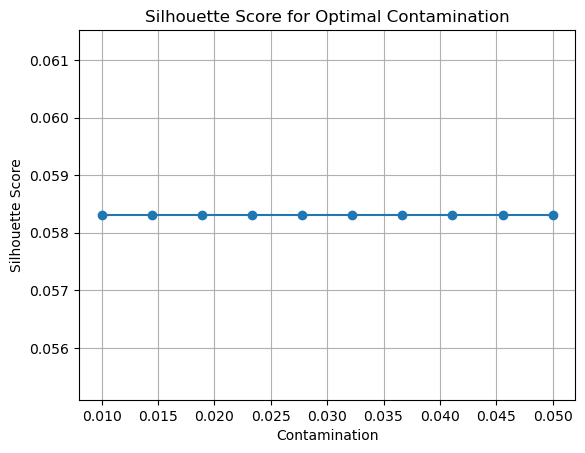

Optimal Contamination: 0.01
   maturity_value  category  currency  amount  anomaly
0            1000         3         2     500     True
1            2000         1         0     800    False
2            1500         0         2     600    False
3            1200         4         1     700    False
4            1800         2         0     900    False


In [44]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Range of contamination values to try
contamination_values = np.linspace(0.01, 0.05, 10)

# Evaluate different contamination values using silhouette score
silhouette_scores = []
for contamination in contamination_values:
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(X_scaled)
    labels = iso_forest.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the silhouette scores to determine the optimal contamination value
plt.plot(contamination_values, silhouette_scores, marker='o')
plt.xlabel('Contamination')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Contamination')
plt.grid()
plt.show()

# Choose the optimal contamination value that maximizes the silhouette score
optimal_contamination = contamination_values[np.argmax(silhouette_scores)]
print(f'Optimal Contamination: {optimal_contamination:.2f}')

# Train the Isolation Forest model using the optimal contamination value
iso_forest = IsolationForest(contamination=optimal_contamination, random_state=42)
iso_forest.fit(X_scaled)
anomaly_predictions = iso_forest.predict(X_scaled)

# Add 'anomaly' column to the DataFrame
data['anomaly'] = np.where(anomaly_predictions == -1, True, False)

# Display the updated dataframe
print(data)

In [ ]:
Appendix

In [ ]:
Give me more non-algorithmic density-based features apparoches?
ChatGPT
Certainly, here are a few more non-algorithmic density-based feature approaches that you can consider for your anomaly detection task:

Neighborhood Consistency:

Calculate the proportion of neighboring data points within a certain radius that belong to the same category or have similar attribute values. Anomalies might deviate from the consistency observed in their neighborhoods.
Local Density Range:

Calculate the difference between the maximum and minimum local densities within a certain radius for each data point. Anomalies might have higher local density ranges.
Density Variance within Neighbors:

Compute the variance of densities within the neighbors of each data point. Anomalies might have higher variance due to the presence of sparse or dense regions.
Nearest Neighbor Density Ratio:

Calculate the ratio of the density of a data point to the density of its nearest neighbor. Anomalies might have lower ratios, indicating relatively sparse neighborhoods.
Local Density Variance over Time:

If you have a temporal component, calculate the variance of local densities within a certain radius over a window of time. Sudden changes in variance might indicate anomalies.
Local Density vs. Global Density:

Calculate the ratio of the local density of a data point to the global density of the entire dataset. Anomalies might have lower ratios due to their presence in sparse regions.
Neighborhood Similarity:

Measure the similarity (e.g., cosine similarity, correlation) of the density profiles of neighboring data points. Anomalies might have dissimilar neighborhoods.
Density Gradient Change:

Calculate the change in density gradients between consecutive data points along a trajectory. Anomalies might exhibit sudden changes in density gradient patterns.
Density-Based Change Points:

Identify change points in the density distribution within a certain radius. Sudden shifts in density patterns might correspond to anomalies.
Local Density Skewness/Kurtosis:

Compute the skewness or kurtosis of densities within a certain radius. Anomalies might have skewed or non-normal density distributions.
Local Density Variance by Cluster:

If you have clustered your data, calculate the variance of densities within the cluster that each data point belongs to. Anomalies might have higher variance.
Density Profile Slope:

Calculate the slope of the density profile as you move away from the data point. Anomalies might have steeper or flatter density slopes.
Remember that the effectiveness of these features can depend on the specific characteristics of your data and the anomaly patterns you're dealing with. It's recommended to experiment with a combination of these features and evaluate their impact on your anomaly detection model's performance.

In [ ]:
Certainly, here are some non-algorithmic density-based features that you can calculate for
important variables to aid in anomaly prediction:

Local Density Percentile:

For each data point, calculate the percentage of other data points within a certain radius. This can be a measure of how densely the points are packed around each point.
Local Density Ratio:

Calculate the ratio of the number of data points within a certain radius to the total number of data points. This can indicate how concentrated the points are in a local region.
Density Ranking:

Rank data points based on the number of other points within a certain radius. Points with lower rankings might be indicative of anomalies.
Density Variability:

Calculate the standard deviation of the number of data points within a certain radius for each data point. Points with higher variability might be anomalies.
Relative Density:

Compute the density of each data point relative to the average density of the entire dataset. Points with lower relative densities could be anomalies.
Inverse Density:

Calculate the inverse of the density for each data point. This could help identify points that are in sparse regions.
Density Percentile in Cluster:

If you group data points into clusters, calculate the percentile of the density within each cluster. Points with lower percentiles might be anomalies.
Distance-Weighted Density:

Calculate the density for each data point based on the inverse of distances to its k-nearest neighbors. Anomalies might have lower distance-weighted densities.
Density-Based Outlier Score:

Combine multiple density-related features into a single score that captures the anomaly likelihood based on density patterns.
Density vs. Nearest Neighbor Ratio:

Calculate the ratio of the local density to the distance of the nearest neighbor. Anomalies might have lower ratios.
Local Density Trend:

Calculate the trend of density change for each data point over a window of time. Abrupt changes might indicate anomalies.
Density Differential:

Calculate the difference in density between a data point and its k-nearest neighbors. Anomalies might have larger density differentials.
Remember, while these features are non-algorithmic and can provide insights into the density patterns of your data, they might not capture all nuances of anomalies. Combining these features with algorithmic methods can often lead to more accurate anomaly detection. It's important to experiment and evaluate the impact of these features on your specific anomaly detection task.

In [ ]:
Density-based features are important for anomaly prediction because they capture how data points are distributed in relation to each other. Anomalies often deviate from the typical density patterns exhibited by the majority of data points. Here are several density-based features you can calculate for important variables to aid in anomaly prediction:

Local Density Percentile:

Calculate the percentage of data points within a certain radius of each data point. Anomalies might have lower local densities compared to the majority of data points.
Local Density Ratio:

Calculate the ratio of the number of data points within a certain radius to the total number of data points. Anomalies could have significantly lower local density ratios.
Local Density Ranking:

Rank data points based on their local density. Points with low ranking might indicate anomalies in sparse regions.
Density Gradient:

Calculate the gradient of density around each data point. Anomalies might have sharper density gradients.
Cluster Density:

Assign each data point to a cluster using a clustering algorithm (e.g., DBSCAN) and calculate the density of the cluster. Anomalies could be found in clusters with low densities.
Density Variability:

Calculate the standard deviation of densities within a certain radius for each data point. Anomalies might exhibit higher variability in density.
Relative Density:

Compute the density of each data point relative to the average density of the entire dataset. Anomalies might have lower relative densities.
Kernel Density Estimate:

Calculate the kernel density estimate for each data point based on its neighbors' distances. Anomalies might have lower kernel density estimates.
Local Outlier Factor (LOF):

Calculate the LOF score for each data point based on the ratio of its local density to the densities of its neighbors. Higher LOF scores can indicate anomalies.
Average Density of Neighbors:

Calculate the average density of neighbors for each data point. Anomalies could have lower average neighbor densities.
Local Density Outlier Score:

Create a score that combines the local density and LOF score to identify potential anomalies.
Inverse Density:

Calculate the inverse of the density for each data point. Anomalies might have higher inverse densities.
Remember that the effectiveness of these features can vary depending on the specific characteristics of your data and the types of anomalies you're trying to detect. It's important to experiment with different density-based features and evaluate their impact on your anomaly detection model's performance. Additionally, combining multiple density-based features along with other types of features can often yield better results.

In [ ]:
Certainly, here are some non-algorithmic computational methods to create features based on density, distance, and proximity concepts:

Density-Based Features:
Local Density Percentile: For each data point, calculate the percentage of other points within a certain radius. This can give you an idea of how densely packed the points are around each data point.

Distance-Based Features:
Average Distance to All Data Points: Compute the average Euclidean distance of each data point to all other data points. This can give a general idea of how spread out a point is from the rest of the data.

Proximity-Based Features:
Number of Points within Radius: Count the number of data points within a certain radius of each data point. This count can serve as a proximity-related feature.

Density-Radius Features:
Density-to-Radius Ratio: Calculate the ratio of the number of points within a certain radius to the area (volume in higher dimensions) that radius covers. This can indicate how densely points are distributed in a local region.

Anomaly Score Features:
Rank of Sorted Distances: Sort the distances of each data point to all other data points and calculate the rank of the data point's own distance. This can indicate how far or near the data point is compared to others.

Nearest Neighbor Features:
Average Distance to Nearest Neighbors: For each data point, calculate the average distance to its k-nearest neighbors. A higher average distance could indicate potential anomaly.

    
Quantile-Based Features:
Percentile of Distance: Calculate the percentile rank of each data point's distance to all other data points. This can give you a measure of how distant a data point is compared to the rest.

Weighted Distance Features:
Weighted Average Distance: Assign different weights to each data point based on a certain criterion (e.g., based on the category or currency), and calculate the weighted average distance of each data point to others.

In [ ]:
anomalies often rely on characteristics like density, distance, or proximity to distinguish anomalies.?.
So can you create some features based on these concepts from important variables?

In [ ]:
Certainly! Characteristics like density, distance, and proximity can indeed be used to identify anomalies. Here are some feature creation methods based on these concepts:

Density-Based Features:

Local Outlier Factor (LOF): Compute the LOF scores for each data point, indicating how much the density around the point differs from its neighbors. A higher LOF score can be considered a feature indicating potential anomaly.
Distance-Based Features:

Distance to Nearest Neighbors:
Calculate the average distance to the k-nearest neighbors for each data point. Anomalies might have larger distances to their neighbors.

Mahalanobis Distance: Calculate the Mahalanobis distance of each data point from the centroid or mean of the dataset.
Points with higher Mahalanobis distances could be anomalies.

    
Proximity-Based Features:
Cluster Membership: If you apply clustering algorithms like k-means, assign each data point to a cluster and use the cluster ID as a feature. Points that do not belong to any cluster or belong to a very small cluster might be anomalies.
Distance to Cluster Center: Compute the distance of each data point to the centroid of its assigned cluster. Anomalies could have larger distances.
Density-Radius Features:

Local Density and Radius: Calculate the density of each data point based on the number of points within a certain radius. Anomalies might have low local densities compared to their radius.
Kernel Density Estimation Features:

Kernel Density Estimation (KDE): Estimate the density function of your data using KDE. Lower densities in certain areas might indicate potential anomalies.
Anomaly Score Features:

Isolation Forest or Autoencoder Scores: If you use anomaly detection algorithms like Isolation Forest or autoencoders, use the anomaly scores as features. Higher scores can suggest anomalies.
Nearest Neighbor Features:

Average Nearest Neighbor Distance: Calculate the average distance to the nearest neighbor for each data point. Anomalies might have larger average distances.
Quantile-Based Features:

Quantile Ranks: Calculate the quantile rank of each data point with respect to its neighbors' distances. Anomalies might have lower quantile ranks.
Remember that these features are based on the concepts of density, distance, and proximity, and their effectiveness might vary depending on your data and the specific anomaly patterns you're looking for. It's a good idea to experiment with multiple feature creation methods and evaluate their performance using appropriate metrics to ensure the best results for your anomaly detection model.

In [ ]:
Give me some non algorithms features creation method but very dynamic and robust to find anamolies 
ChatGPT
Creating non-algorithmic features that are dynamic and robust for anomaly detection involves leveraging the inherent characteristics of your data. Here are some methods that can help you create such features:

Relative Change: Calculate the relative change of each variable from its past values. Anomalies might lead to sudden and significant changes in relative values.

Z-Score Transformation: Standardize variables using the z-score transformation. Unusually high or low z-scores could indicate anomalies.

Seasonality Decomposition: Use time series decomposition methods (like Seasonal Decomposition of Time Series, or STL) to extract trend, seasonal, and residual components. Anomalies might lead to significant deviations in residuals.

Entropy Measures: Calculate entropy for each variable to capture the unpredictability or randomness. Higher entropy values might indicate anomalies.

Moving Range: Calculate the moving range of values within a window. Anomalies could lead to sudden and unusual changes in the moving range.

Principal Component Analysis (PCA): Reduce the dimensionality of your variables using PCA. Anomalies might project to a subspace that's significantly different from the majority.

Spike Detection: Identify sudden spikes or drops in variable values. Unusual spikes might indicate anomalies.

Aggregated Statistics: Create features based on aggregated statistics (mean, median, min, max) over different time windows or subsets of data.

Residual Analysis: If you have a model fitted to your data, calculate the residuals (the difference between actual and predicted values). Anomalies might lead to large residuals.

Frequency Domain Analysis: Apply Fourier transforms to identify cyclic patterns in data. Anomalies might disrupt these patterns.

Lagged Variables: Create features that represent the value of a variable at a previous time step. Anomalies might influence subsequent time periods.

Cross-Correlation: Calculate cross-correlations between variables to capture dependencies. Anomalies might lead to unexpected cross-correlations.

Symbolic Aggregate Approximation (SAX): Convert time series data into a symbolic representation to capture patterns. Anomalies could lead to different symbolic sequences.

Cyclic Patterns: If your data exhibits cyclic behavior, create features based on the phase of the cycle. Anomalies might lead to phase shifts.

Event Count: Count the occurrences of specific events or patterns. Anomalies might lead to unusual event counts.

In [ ]:
from scipy.stats import ks_2samp
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'feature_1': [0.2, 0.5, 0.7, 0.8, 0.9],
    'feature_2': [1.2, 1.5, 1.8, 2.8, 3.0]
}
df = pd.DataFrame(data)

significant_variables = []  # Store significant variable names here

for var in df.columns:
    statistic, p_value = ks_2samp(df[var], df[var]*2)  # Simulate different distribution for illustration
    effect_size = statistic  # Effect size can be the KS statistic itself in this case
    if p_value < 0.05 and effect_size > 0.1:
        significant_variables.append(var)

print("Significant variables:", significant_variables)


In [ ]:
Multiple Hypothesis Correction is a statistical technique used to adjust p-values when conducting multiple hypothesis tests simultaneously. It helps control the overall false positive rate when you are testing multiple variables or conducting multiple tests. There are several methods for multiple hypothesis correction, and two commonly used ones are the Bonferroni correction and the False Discovery Rate (FDR) control.

Bonferroni Correction:
The Bonferroni correction is a simple and conservative method. It divides the desired significance level (usually 0.05) by the number of tests being conducted. If you find p-values below the adjusted threshold, those variables are considered significant.

In [ ]:
adjusted_alpha = 0.05 / num_tests  # num_tests is the number of tests being conducted
significant_variables = [var for var in variables if p_values[var] < adjusted_alpha]


In [ ]:
False Discovery Rate (FDR) Control:
FDR control is less conservative compared to Bonferroni correction and is more suited when you have a
large number of tests. The Benjamini-Hochberg procedure is commonly used for FDR control. It sorts p-values in ascending order and compares each p-value with its rank divided by the total number of tests, multiplied by the desired false discovery rate (usually 0.05).

In [ ]:
p_values_sorted = np.sort(p_values)
num_tests = len(p_values)
q_values = p_values_sorted * num_tests / np.arange(1, num_tests+1)
significant_variables = [var for var in variables if p_values[var] < q_values[var_rank]]


In [ ]:
It's important to note that both methods aim to control the false discovery rate,
but the Bonferroni correction is more stringent and might lead to more false negatives.
FDR control allows for more discoveries while still controlling the overall false positive rate.